# Visualizations about the dataset
This dataset covers  **`190 countries`** around the world (~about **`1100 cities`**) with over than **`73000 hotels`**. Each hotel includes around **`400 features`**.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from collections import Counter

In [2]:
def split_data(data):
    features_string = ''
    for row in data:
        features_string += str(row)
    return list(features_string.split(","))
        
def most_common(seq):
    data = split_data(seq)
    most_common_counter = Counter(data)
    most_common = most_common_counter.most_common(20)
    return [country for country, _ in most_common],  [count for _, count in most_common]

In [3]:
df = pd.read_csv('/Users/osamaalhalabi/Desktop/trips-planning-system/dataset/Hotel_Features_Dataset.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [4]:
df.sample(3)

,name,country,street,region,rating,reviews,amenities,rooms,types,price,official_description
5611,Lodge Du Chateau,Ethiopia,Explore Abyssinia PIazza,Amhara Region,4.5,"{'Excellent': 341, 'Good': 162, 'Average': 47,...","Free internet,Free breakfast,Hiking,Horseback ...","Desk,Housekeeping,Seating area,Bottled water,C...","Mountain view,City view,Non-smoking rooms",NaN,NaN
34415,Olivia B&B,Italy,Via Castel Dei Bobi 3,Tuscany,5.0,"{'Excellent': 41, 'Good': 3, 'Average': 0, 'Po...","Free parking,Free High Speed Internet (WiFi),W...","Air conditioning,Refrigerator,Flatscreen TV,Ba...",Family rooms,NaN,NaN
9704,Baymont by Wyndham Warrenton,United States,7379 Comfort Inn Dr Us 29,Virginia,3.0,"{'Excellent': 69, 'Good': 81, 'Average': 102, ...","Free parking,Free High Speed Internet (WiFi),P...","Flatscreen TV,Bridal suite,Non-smoking rooms,S...","Bridal suite,Non-smoking rooms,Suites",NaN,NaN


### Distribution of hotels over countries

In [5]:
most_common_countries = df['country'].value_counts().reset_index().head(20)
most_common_countries.columns = ['country','hotels count']

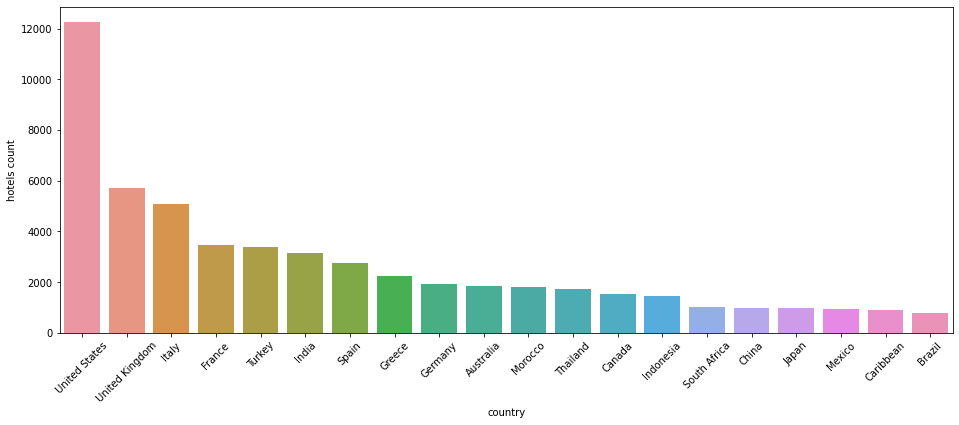

In [6]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'country' , y = 'hotels count', ax=ax, data=most_common_countries)
plt.xticks(rotation=45)
plt.show()

### Distribution of hotels over Arabic countries

In [7]:
arabic_countries = [
    'Lebanon',
    'Iraq',
    'Jordan',
    'Egypt',
    'United Arab Emirates',
    'Morocco',
    'Tunisia',
    'Saudi Arabia',
    'Oman',
    'Bahrain',
    'Algeria',
    'Qatar',
    'Kuwait',
    'Libya',
    'South Sudan',
    'Sudan',
]

In [8]:
df_ = pd.DataFrame(df[df['country'] == 'Syria'])
for country in arabic_countries:
    df_ = df_.append(df[df['country'] == country])

In [9]:
arabic_most_common_countries = df_['country'].value_counts().reset_index().head(12)
arabic_most_common_countries.columns = ['country','hotels count']

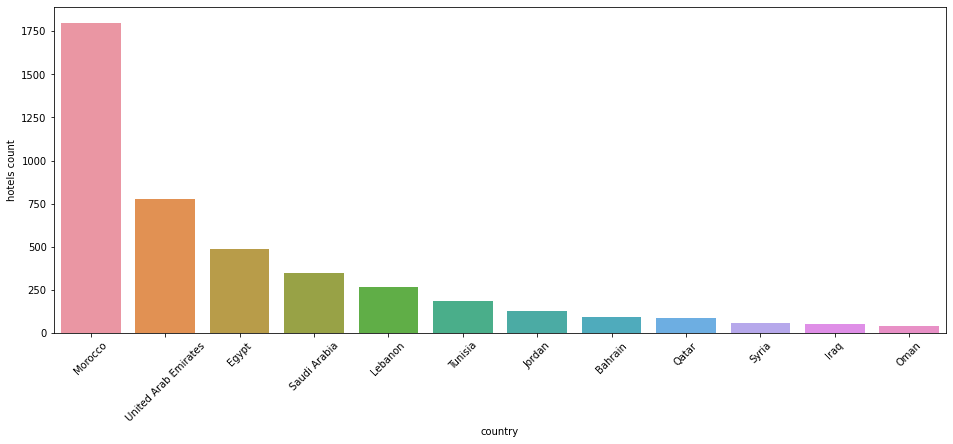

In [10]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'country' , y = 'hotels count', ax=ax, data=arabic_most_common_countries)
plt.xticks(rotation=45)
plt.show()

### Distribution of star-rating

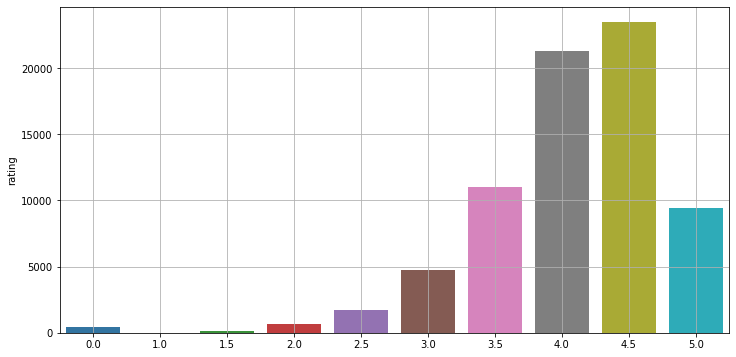

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x = df.rating.value_counts().index , y = df.rating.value_counts(), ax=ax, data=df,)
plt.grid()

In [12]:
ratings = pd.DataFrame.from_dict([eval(row) for row in df.reviews])

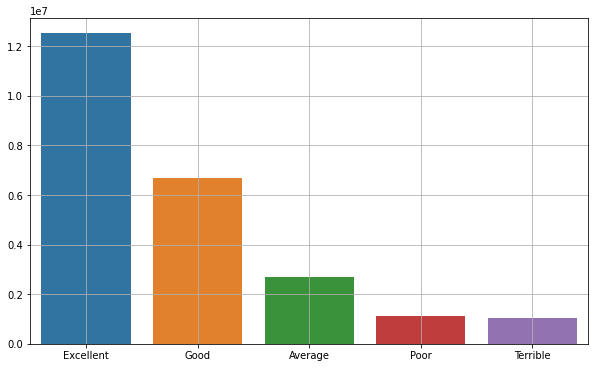

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = ratings.columns , y = ratings.sum(), ax=ax)
plt.grid()

### Distribution of guest-rating

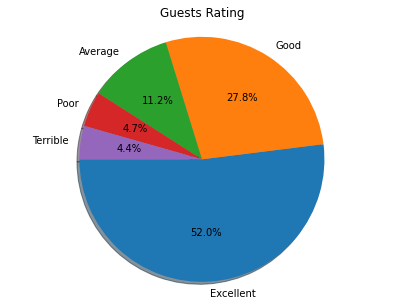

In [14]:
fig1, ax1 = plt.subplots(figsize =(7, 5))
ax1.pie(ratings.sum(), labels = ratings.columns, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')
ax1.set_title('Guests Rating')
plt.show()

### Most common amenities in hotels 

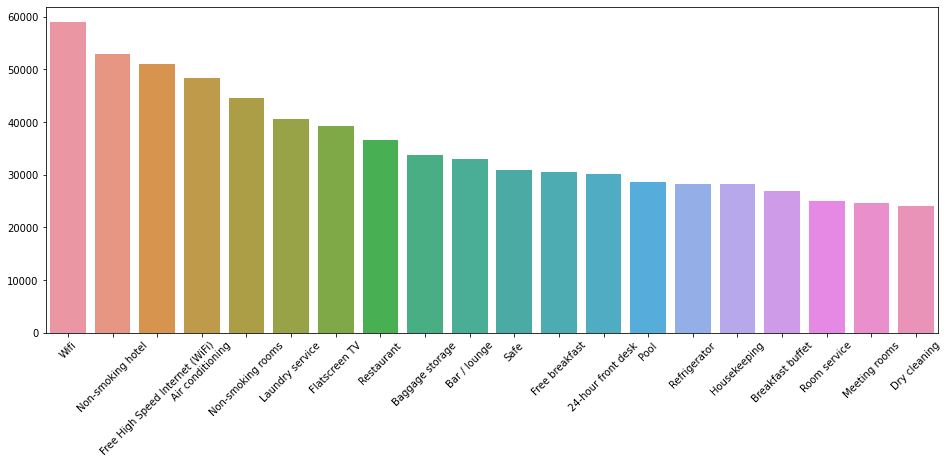

In [15]:
words , counts = most_common(df.amenities)
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x =  words, y = counts, ax=ax)
plt.xticks(rotation=45)
plt.show()

### Most common amenities in rooms

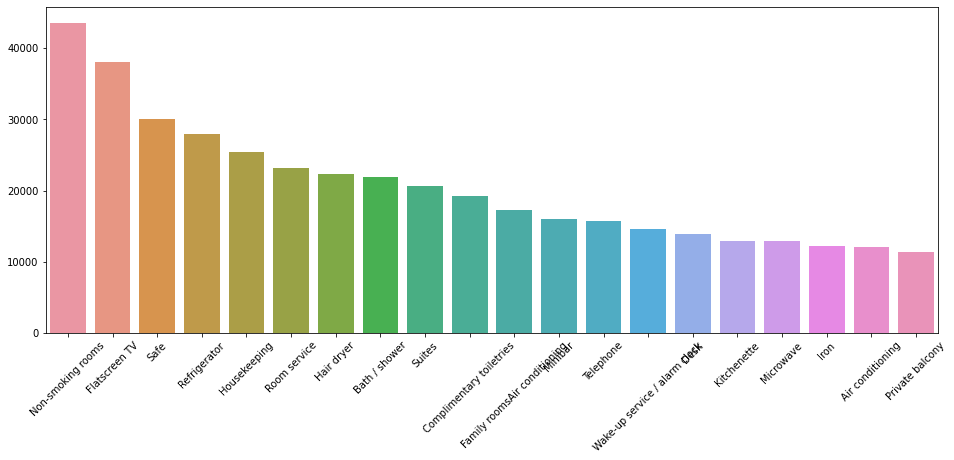

In [16]:
words , counts = most_common(df.rooms)
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x =  words, y = counts, ax=ax)
plt.xticks(rotation=45)
plt.show()